In [1]:

# Dependencies and Setup# Depend 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

# List for holding lat_lngs and cities# List f 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
# OpenWeatherMap API Key
api_key = "ca294ce65abca9f09d73ca7571ded08e"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=cairns
Processing Record 2 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=ushuaia
Processing Record 3 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=bluff
Processing Record 4 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=saint-philippe
Processing Record 5 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=atuona
Processing Record 6 of Set 1 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=faanui
Processing Record 7 of Set 1 | matau

Processing Record 4 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=hermanus
Processing Record 5 of Set 2 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=hambantota
Processing Record 6 of Set 2 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=belushya%20guba
City not found. Skipping...
Processing Record 7 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=port%20alfred
Processing Record 8 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=hobart
Processing Record 9 of Set 2 | wulanhaote
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=wulanhaote
City not found. Skipping...
Processi

Processing Record 8 of Set 3 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=petropavlovsk-kamchatskiy
Processing Record 9 of Set 3 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=ribeira%20grande
Processing Record 10 of Set 3 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 3 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=egvekinot
Processing Record 12 of Set 3 | bhabua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=bhabua
Processing Record 13 of Set 3 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=saint%20

Processing Record 11 of Set 4 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=hamilton
Processing Record 12 of Set 4 | ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=ngunguru
Processing Record 13 of Set 4 | zverinogolovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=zverinogolovskoye
Processing Record 14 of Set 4 | antrim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=antrim
Processing Record 15 of Set 4 | guara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=guara
Processing Record 16 of Set 4 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=leningradskiy
Processing Record 17 of Set 4 | ilo
http://api.openweathermap.or

Processing Record 15 of Set 5 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=cabedelo
Processing Record 16 of Set 5 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=airai
Processing Record 17 of Set 5 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 5 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=barentsburg
City not found. Skipping...
Processing Record 19 of Set 5 | vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=vaitape
Processing Record 20 of Set 5 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=tuatapere
Processing Recor

Processing Record 17 of Set 6 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=zhigansk
Processing Record 18 of Set 6 | pipraich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=pipraich
Processing Record 19 of Set 6 | malindi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=malindi
Processing Record 20 of Set 6 | mocambique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=mocambique
City not found. Skipping...
Processing Record 21 of Set 6 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=pangnirtung
Processing Record 22 of Set 6 | novaya lyada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=novaya%20lyada
Processing Record 23 of Set 6 | nano

Processing Record 19 of Set 7 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=vao
Processing Record 20 of Set 7 | christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=christchurch
Processing Record 21 of Set 7 | shakawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=shakawe
Processing Record 22 of Set 7 | oparino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=oparino
Processing Record 23 of Set 7 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=marsh%20harbour
Processing Record 24 of Set 7 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=mount%20gambier
Processing Record 25 of Set 7 | kemi
http://api.openweathermap.o

Processing Record 23 of Set 8 | anshun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=anshun
Processing Record 24 of Set 8 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=bolungarvik
City not found. Skipping...
Processing Record 25 of Set 8 | charleston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=charleston
Processing Record 26 of Set 8 | rurrenabaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=rurrenabaque
Processing Record 27 of Set 8 | akyab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=akyab
City not found. Skipping...
Processing Record 28 of Set 8 | burica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=burica
City not found. Skippi

Processing Record 26 of Set 9 | hong gai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=hong%20gai
Processing Record 27 of Set 9 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=guerrero%20negro
Processing Record 28 of Set 9 | bagdarin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=bagdarin
Processing Record 29 of Set 9 | kiruna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=kiruna
Processing Record 30 of Set 9 | matay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=matay
Processing Record 31 of Set 9 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=krasnoselkup
City not found. Skipping...
Processing Record 32 of Set 9 | rio brav

Processing Record 29 of Set 10 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=sao%20joao%20da%20barra
Processing Record 30 of Set 10 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=torbay
Processing Record 31 of Set 10 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=auki
Processing Record 32 of Set 10 | boat of garten
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=boat%20of%20garten
Processing Record 33 of Set 10 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=vostok
Processing Record 34 of Set 10 | novichikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=novichikha
Processing Record 35 of Set 10 | bajo baudo
http

Processing Record 32 of Set 11 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=araouane
Processing Record 33 of Set 11 | cercal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=cercal
Processing Record 34 of Set 11 | tupik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=tupik
Processing Record 35 of Set 11 | tasbuget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=tasbuget
City not found. Skipping...
Processing Record 36 of Set 11 | pop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=pop
Processing Record 37 of Set 11 | vernon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=vernon
Processing Record 38 of Set 11 | la asuncion
http://api.openweathermap.o

Processing Record 34 of Set 12 | nakamura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=nakamura
Processing Record 35 of Set 12 | begowal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=begowal
Processing Record 36 of Set 12 | nishihara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=nishihara
Processing Record 37 of Set 12 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=derzhavinsk
Processing Record 38 of Set 12 | longlac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=longlac
City not found. Skipping...
Processing Record 39 of Set 12 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ca294ce65abca9f09d73ca7571ded08e&q=tual
Processing Record 40 of Set 12 | krasnyy chikoy
http

In [5]:

# Convert array of JSONs into Pandas DataFrame# Conver 
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cairns,20,AU,1531508400,82,-16.92,145.77,62.60,10.29
1,ushuaia,75,AR,1531508400,69,-54.81,-68.31,39.20,26.40
2,bluff,0,AU,1531510034,69,-23.58,149.07,39.33,5.41
3,saint-philippe,40,CA,1531508400,37,45.36,-73.48,84.20,4.70
4,atuona,0,PF,1531510034,100,-9.80,-139.03,79.83,17.05


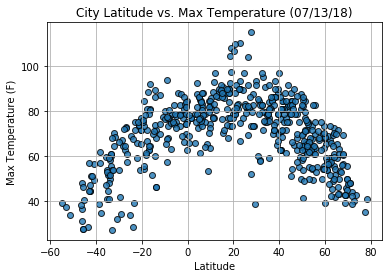

In [8]:

# Build scatter plot for latitude vs temperature# Build  
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Resources/Fig1.png")

# Show plot
plt.show()

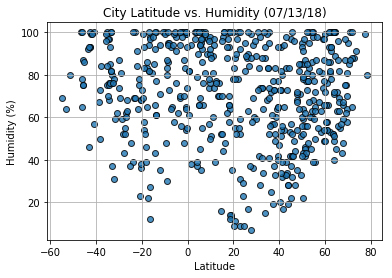

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Resources/Fig2.png")

# Show plot
plt.show()

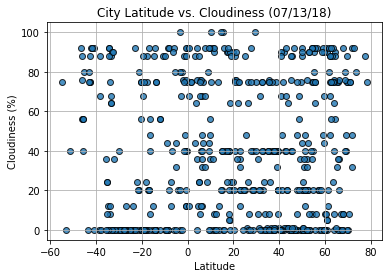

In [10]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Resources/Fig3.png")

# Show plot
plt.show()

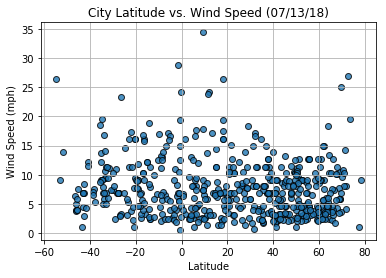

In [11]:

# Build the scatter plots for each city types# Build  
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./Resources/Fig4.png")

# Show plot
plt.show()